<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
trans_df = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [6]:
# review data
trans_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
# checking null cell
trans_df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# review datatype
trans_df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
trans_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [10]:
# replace typo type 'Unkown' to 'Unknown'
trans_df['type'] = trans_df['type'].replace('Unkown', 'Unknown')

In [11]:
trans_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unknown'], dtype=object)

In [12]:
# review DataFrame shape
trans_df.shape

(985, 12)

In [13]:
# review number columns
trans_df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


### Finding potential invalid data

#### zero bed room

In [16]:
# Calculate percentage without bed room
print(f"Percentage of housing without bed room: {trans_df[trans_df['beds'] < 1].shape[0] / trans_df.shape[0] * 100:.2f}")

Percentage of housing without bed room: 10.96


#### zero bath room

In [18]:
# Calculate percentage without bath room
print(f"Percentage of housing without bed room: {trans_df[trans_df['baths'] < 1].shape[0] / trans_df.shape[0] * 100:.2f}")

Percentage of housing without bed room: 10.96


In [19]:
# We need to predict price with theses variables, so we need filter and assign to new variables
trans_df['has_beds'] = np.where(trans_df['beds'] > 0, 1, 0)
trans_df['has_baths'] = np.where(trans_df['baths'] > 0, 1, 0)

#### Invalid sq__ft

In [21]:
# query invalid sq__ft
trans_df[trans_df['sq__ft'] < 1].sort_values(by='sq__ft').head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,has_beds,has_baths
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,1,1
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,0,0
599,15 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885571,-121.289421,0,0
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436,0,0
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436,0,0


In [22]:
# remove zero sq__ft 
trans_df = trans_df[trans_df['sq__ft'] != 0]

# fix negative sq__ft
trans_df.loc[trans_df['sq__ft'] < 0, 'sq__ft'] = - trans_df['sq__ft']

#### Invalid coordinate

In [24]:
# filter invalid latitude and longitude
trans_df[(trans_df['latitude'] < 37) | (trans_df['latitude'] > 40) | \
(trans_df['longitude'] < -122) | (trans_df['longitude'] > -120)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,has_beds,has_baths
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,1,1


In [25]:
# found only 1 row, manual fix
trans_df.loc[703, 'latitude'] = 38.668433
trans_df.loc[703, 'longitude'] = -121.503471
# review corrected row
trans_df.loc[703]

street                   1900 DANBROOK DR
city                           SACRAMENTO
zip                                 95835
state                                  AC
beds                                    1
baths                                   1
sq__ft                                984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                             -210944
latitude                        38.668433
longitude                     -121.503471
has_beds                                1
has_baths                               1
Name: 703, dtype: object

#### Negative price

In [27]:
# query invalid price
trans_df[trans_df['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,has_beds,has_baths
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,38.668433,-121.503471,1,1


In [28]:
# found only one row, manual fix
trans_df.loc[703, 'price'] = 210944

#### Price anomalies

In [30]:
# review price outlier
trans_df.sort_values(by='price').head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,has_beds,has_baths
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337,1,1
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,Fri May 16 00:00:00 EDT 2008,30000,38.715322,-121.314787,1,1
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,Mon May 19 00:00:00 EDT 2008,40000,38.673678,-121.357471,1,1
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,Mon May 19 00:00:00 EDT 2008,48000,38.582279,-121.401482,1,1
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,Fri May 16 00:00:00 EDT 2008,55422,38.471646,-121.435158,1,1


<Axes: xlabel='price'>

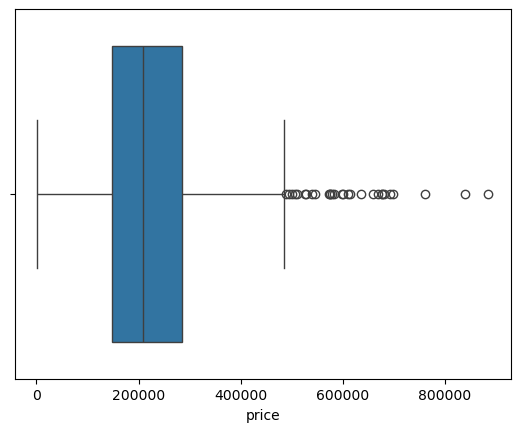

In [31]:
sns.boxplot(x='price', data=trans_df)

#### Invalid state code

In [33]:
# review state code
trans_df['state'].unique()

array(['CA', 'AC'], dtype=object)

In [34]:
# replace 'AC' to 'CA'
trans_df['state'] = trans_df['state'].replace('AC', 'CA')
trans_df['state'].unique()

array(['CA'], dtype=object)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [36]:
trans_df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [38]:
# Choose variables with a number to calculate correlation
trans_df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
has_beds       int32
has_baths      int32
dtype: object

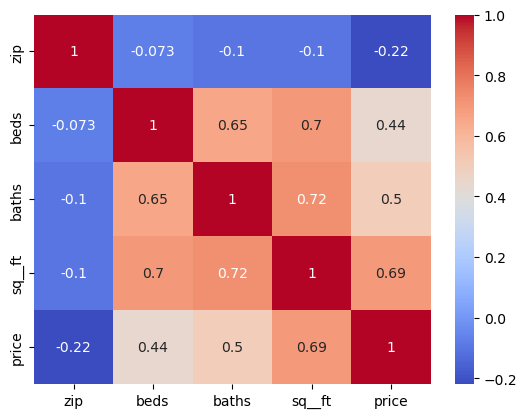

In [39]:
# Plot a compare of variables correlation
sns.heatmap(trans_df[['zip', 'beds','baths', 'sq__ft', 'price']].corr(), cmap='coolwarm', annot=True);

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

In [41]:
# select columns with have high correlation with 'price' are
# - beds
# - baths
# - sq__ft

features = ['beds', 'baths', 'sq__ft']
X = trans_df[features]
y = trans_df['price']

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [43]:
import scipy

# implement linear regression in numpy
# beta0 intercept
# beta1 coefficient

def linear_regression(x, y):
    beta1 = (scipy.stats.pearsonr(x,y)[0] * np.std(y) / np.std(x))
    beta0 = np.mean(y) - (beta1*np.mean(x))
    return beta0, beta1

In [44]:
# get result for each potential feature
for feature in features:
    beta0, beta1 = linear_regression(X[feature], y)
    #sse = 
    print(f"Coefficient on X({feature}) = {beta1:,.4f}, intercept = {beta0:,.4f}")

Coefficient on X(beds) = 62,151.2963, intercept = 27,800.2450
Coefficient on X(baths) = 89,773.8059, intercept = 53,429.9494
Coefficient on X(sq__ft) = 125.2165, intercept = 30,210.6339


### 6. Now interpret the intercept and the slope.

The model return two values are `beta0` and `beta1`

 * `beta0` is the y-**intercept** that our model learns. The point where the line crosses the y-axis.
 * `beta1` is the coefficient that we multiply by variable  `x`. It' the **slope**.. For every 1 unit i change in `x`
, y increases by the value  `beta1`
.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [48]:
# y = beta0 + beta1 * x

beta0, beta1 = linear_regression(X['sq__ft'], y)

test_sq_ft = 1039

predict_price = beta0 + beta1 * test_sq_ft

print(f"Predict price of {test_sq_ft:,} sq.ft. is {predict_price:,.2f}")

Predict price of 1,039 sq.ft. is 160,310.56


### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

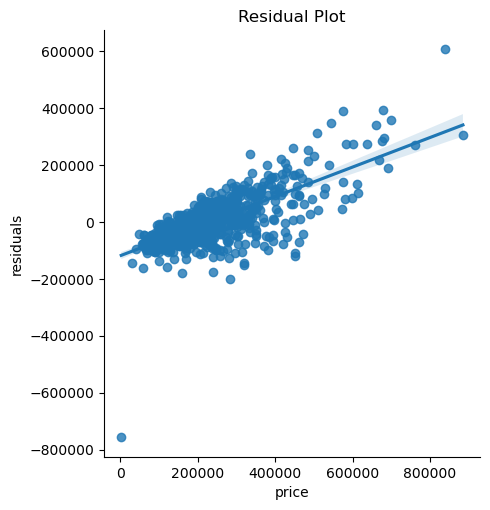

In [50]:
# y_pred = beta0 + beta1 * x
# convert DataFrame to a np.ndarray
x = trans_df['sq__ft'].values

# calculate prediction value
trans_df['prediction'] = beta0 + beta1 * x

# calculate residuals
trans_df['residuals'] = trans_df['price'] - trans_df['prediction']

sns.lmplot(x='price', y='residuals', data=trans_df)
plt.title('Residual Plot');

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [53]:
# Convert the type column into dummy-coded variables
type_df = pd.get_dummies(trans_df, columns=['type'], drop_first=True)

In [54]:
# review data types
type_df.dtypes

street                object
city                  object
zip                    int64
state                 object
beds                   int64
baths                  int64
sq__ft                 int64
sale_date             object
price                  int64
latitude             float64
longitude            float64
has_beds               int32
has_baths              int32
prediction           float64
residuals            float64
type_Multi-Family       bool
type_Residential        bool
dtype: object

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [56]:
type_df.head(3)

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,has_beds,has_baths,prediction,residuals,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,1,1,134891.616731,-75669.616731,False,True
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,1,1,176338.273822,-108126.273822,False,True
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,1,1,129882.957264,-61002.957264,False,True


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [58]:
from sklearn.linear_model import LinearRegression

features = ['beds', 'baths', 'sq__ft', 'type_Multi-Family', 'type_Residential']
X = type_df[features]
y = type_df['price']

model = LinearRegression()

X = type_df[features]
model.fit(X, y)

LinearRegression()

In [59]:
type_df['prediction'] = model.predict(X)

### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

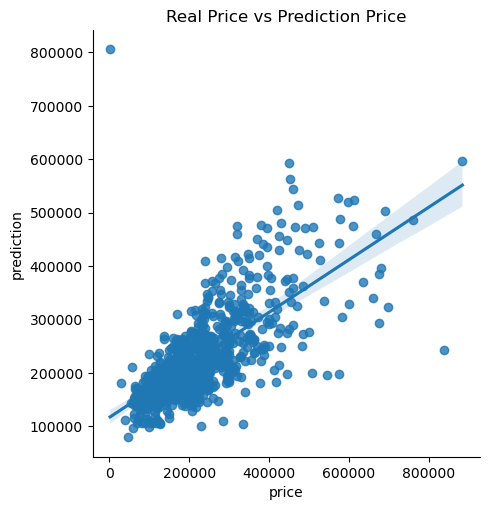

In [61]:
sns.lmplot(x='price', y='prediction', data=type_df)
plt.title('Real Price vs Prediction Price');

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

##### Same as SLR
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
##### Only for MLR
- M - No Multicollinearity/Independence of Predictors

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

I chose these three:


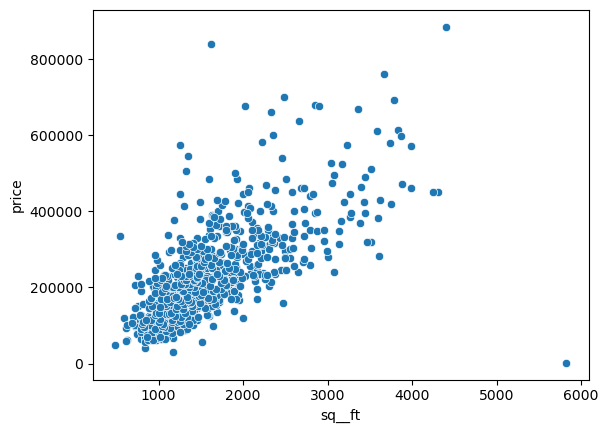

In [66]:
# 1. L - Linear relationship
sns.scatterplot(x='sq__ft', y='price', data=type_df);

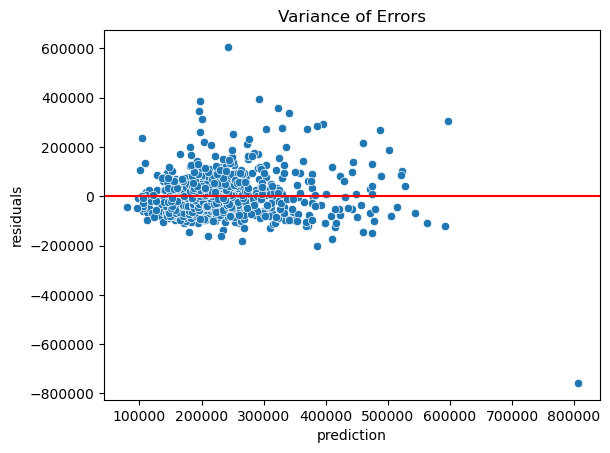

In [67]:
# 2. E - Equal variance of errors

sns.scatterplot(x='prediction', y='residuals', data=type_df)
type_df['residuals'] = type_df['prediction'] - type_df['price']
avg_residuals = np.mean(type_df['residuals'])
plt.axhline(avg_residuals, color='red', label=f'Average: {avg_residuals:.2f}')
plt.title('Variance of Errors');

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [69]:
import statsmodels.api as sm
model = sm.OLS(type_df['price'], type_df['sq__ft']).fit()

In [70]:
# show summary table

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              6377.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        12:49:01   Log-Likelihood:                         -10413.
No. Observations:                 814   AIC:                                  2.083e+04
Df Residuals:                     813   BIC:                                  2.083e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft       141.3912      1.771     79.855      0.000     137.916     144.867
==============================================================================
Omnibus:                      194.607   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6810.933
Skew:                           0.271   Prob(JB):                         0.00
Kurtosis:                      17.161   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [72]:
# formular is Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
# R2: R2 of the model
# n: number of sample
# k: number of features
def r2_adj(y_true, y_pred, features):
    num_features = len(features)
    n = len(y_true)
    sum_res = np.sum(y_true - y_pred**2)
    y_mean = np.mean(y_true)
    sum_total = np.sum((y_true - y_mean)**2)
    r2 = 1 - (sum_res / sum_total)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    return r2_adj

value = r2_adj(type_df['price'], type_df['prediction'], features)
print(f"Value of R2 adjusted is: {value:.4f}")

Value of R2 adjusted is: 5.1885


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [74]:
def calculate_regression_metrics(y_true, y_pred, features):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    r2a = r2_adj(y_true, y_pred, features)
    
    print(f"MSE: {mse:,.4f}, RMSE: {rmse:,.4f}, R-squared adjusted: {r2a:,.4f}")

calculate_regression_metrics(trans_df['price'], trans_df['prediction'], features)

MSE: 7,439,426,337.1032, RMSE: 86,252.1092, R-squared adjusted: 5.1781


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [76]:
# add has_beds and has_baths to features and run fit

features = ['beds', 'baths', 'sq__ft', 'type_Multi-Family', 'type_Residential', 'has_beds', 'has_baths']
X = type_df[features]
y = type_df['price']

model = LinearRegression()

X = type_df[features]
model.fit(X, y)

# run predict
type_df['predition_new'] = model.predict(X)

# compare metrics
calculate_regression_metrics(type_df['price'], type_df['predition_new'], features)

MSE: 7,291,265,232.6986, RMSE: 85,388.9058, R-squared adjusted: 5.1989


After adding features `has_beds` and `has_baths`, both MSE and RMSE reduce, so the new model improves accuracy

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

Since the data is small (~1k rows) and linear regression is more prone to bias than bias and MSE and RMSE are very high, I believe the model is prone to **bias**.